# <span style="font-weight:bold">Week_06(0408) 복습

## NLTK Inaugural

In [4]:
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [5]:
brown = nltk.corpus.brown

In [6]:
# cfd

cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre) #fileids도 넣을 수 있어서 특정해주어야함
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)
# tabulate은 표로 나타내주는 기능

                  can could would  will might   may 
      adventure    48   154   194    51    59     7 
 belles_lettres   249   216   397   246   113   221 
      editorial   124    57   185   235    39    79 
        fiction    39   168   291    56    44    10 
     government   119    38   120   244    13   179 
        hobbies   276    59    83   269    22   143 
          humor    17    33    56    13     8     8 
        learned   367   159   321   340   128   336 
           lore   170   142   188   178    50   170 
        mystery    45   145   189    25    57    15 
           news    94    87   246   389    38    93 
       religion    84    59    69    72    12    79 
        reviews    45    40    48    61    26    47 
        romance    79   195   247    49    51    11 
science_fiction    16    49    80    17    12     4 


In [7]:
# modals의 빈도수가 포함된 cfd 
# word에서 modal_verb가 되는 것

cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre)
    
        # word 중에서 modal이 포함된 것만 추출
        if word.lower() == modal
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


# Inaugural
- 연설문 코퍼스

In [8]:
inaugural = nltk.corpus.inaugural

In [9]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

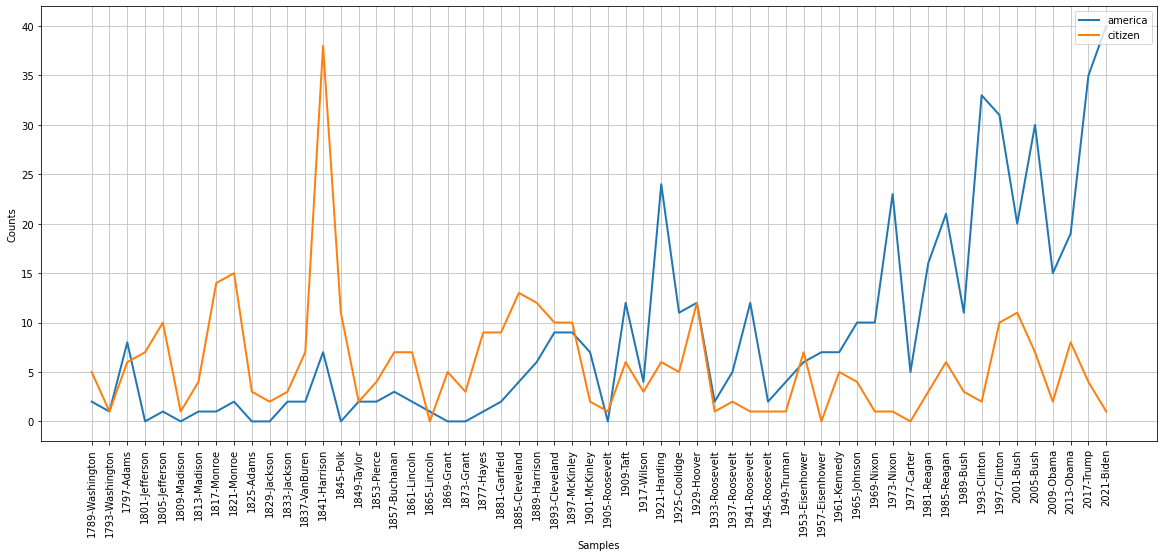

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [130]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오
# 각 단어가 연설문에서 얼마나 쓰였는지를 알기 위함
# citizens, citizen's, ... 다 포함해야 함, == 보다는 나은 방법 찾기

cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen'] # 소문자인 이유가 있음
    
    for word in inaugural.words(fileids=fileid)
        # 3가지 방법 있음
        # if word.lower() == target_word
        # if target_word in word.lower()
        if word.lower().startswith(target_word)
)

# matplotlib으로 크기 조정 가능
import matplotlib.pyplot as pl
pl.figure(figsize=(20,8))
cfd2.plot()

In [12]:
cfd2.tabulate()

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

## Tuple & List
- 불변 객체(튜플) vs. 가변 객체(리스트)
- 주로 리스트를 쓰되, 불변 객체가 필요한 경우 튜플 사용

In [13]:
#1. 생성

emptyT = () # 튜플 생성 1
emptyT = tuple() # 튜플 생성 2

emptyL = [] # 리스트 생성 1
emptyL = list() # 리스트 생성 2

emptyT, emptyL # 이건 튜플로 출력됨

((), [])

In [15]:
# 요소가 여러개일 때

alphabetT = ('a', 'b') # 튜플 만드는 법 1 : 괄호로 묶기
alphabetT = 'a', 'b' # 튜플 만드는 법 2 : 이게 더 편함

alphabetL = ['a', 'b'] # 리스트

print(alphabetT)
alphabetL

('a', 'b')


['a', 'b']

In [16]:
# 1.2. 요소 1개일 때 주의

alphaT = ('a') # 이렇게 하면 튜플이 아니라 스트링으로 인식
type(alphaT)

str

In [18]:
alphaT = ('b', ) # 이렇게 해야 튜플 됨
type(alphaT)

tuple

## packing, unpacking

- packing : 한 변수에 여러 데이터를 할당하는 것
    - list, tuple 자체
    - ex) a = [1,2,3,4]
- unpacking : 한 변수에 여러 데이터가 들어 있을 때 여러 변수로 나누는 것
    - ex) a = 'k', b = 'i', c = 'm'

In [20]:
a, b, c = 'son' # unpacking
a, b, c

('s', 'o', 'n')

In [21]:
# 값 교환하기
# tuple은 값 교환이 편함

# pwd와 userId 값 바꾸기

pwd = 'abcd'
userId = 'sky'

"""
temp1 = userId
temp2 = pwd

pwd = temp1
userId = temp2
"""

pwd, userId = userId, pwd
pwd, userId

('sky', 'abcd')

In [22]:
# 튜플 연산
# 리스트와 유사

('a', ) + (1, 2)
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

In [23]:
# 튜플은 불변객체인데 더해지는지?
# id값 확인해보기

x = ('a', )
y = (1, 2)

id(x), id(x + y)

(2398859410592, 2398860425600)

In [24]:
# id값이 다름 
# 더해서 x, y가 바뀌는게 아님
# x+y는 새로운 변수에 할당되는 것

In [25]:
# 비교 : 첫 인자부터 비교

x = 1, 2
y = 1, 6

x < y

True

In [27]:
# 순회

for i in x:
    print(i)

1
2


In [28]:
# 리스트컴프리헨션 사용 가능(리스트로 바뀜)

[i for i in x]

[1, 2]

In [29]:
# tuple comprehension ? 그런건 없는데
# tuple() 로 변경할 수는 있음

# 리스트컴프리헨션을 튜플에 넣는 방법
tuple([i for i in x])

# *, [], , : 위 방법에 비해 느림
*[i for i in x], 

(1, 2)

In [31]:
# 형변환

dog = 'dog'

# 1. 각 인자를 하나하나 넣어서 튜플로 만듦
dogT = tuple(dog)
print(dogT)

# 2. 전체를 튜플에 넣음
dogT = (dog, )
print(dogT)

# 리스트도 동일한 방법
dogL = list(dog)
print(dogL)

dogL = [dog]
print(dogL)

# 두 개 방법의 차이를 잘 숙지하기

('d', 'o', 'g')
('dog',)
['d', 'o', 'g']
['dog']


In [34]:
# 튜플 슬라이싱도 리스트와 동일하게 가능

dogT = (dog)
dogT[0]

'd'

## [정리]
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근을 막는다.
        - blue=1, white=2, ...
    - 메모리 사용이 적다.
    - 튜플도 중복 가능함(set과 비교)
    
- list 장점
    - 튜플 장점이 필요없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있다는 점 (set과 비교)

## 리스트의 유용한 함수들
- 변경, 삭제, 추가와 관련된 함수
- 리스트컴프리헨션 업그레이드

In [35]:
num = list(range(5))
num 

[0, 1, 2, 3, 4]

In [36]:
# 추가 : list.append()

num.append(6) # 맨 뒤에 요소 추가

# 1개만 추가됨. 여러 개 안됨
# 따로 할당할 필요 없음

num

[0, 1, 2, 3, 4, 6]

In [39]:
# 추가 : list.insert(index, item)
# index 위치에 item을 추가

num.insert(0,8) # 0번째 인덱스에 요소 8을 추가하겠다
num

# 역시 따로 할당할 필요 없음

[8, 0, 1, 2, 3, 4, 6]

In [40]:
# 여러 개 추가 : list.extend(list)
# 리스트를 리스트로 확장
# list.extend(list2) => list2의 요소들을 list 뒤에 붙인다
# 따로 할당할 필요 없음 

num.extend([6,6,6])
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6]

In [41]:
# list.append(list) 는 리스트를 그대로 넣음

x = [7, 2]

num.append(x)
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [7, 2]]

In [42]:
# extend와 append는 아예 다르니까 주의하기

In [43]:
# extend는 +와 동일
num += x
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, [7, 2], 7, 2]

In [44]:
# offset을 활용하여 요소 바꾸기

num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, [7, 2], 7, 2]

In [45]:
# slice

num[:3] = 2, 2, 2 
# 9, 0, 1 을 2, 2, 2로 바꾸겠다는 뜻
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, [7, 2], 7, 2]

In [47]:
# 삭제 : del list[삭제하고 싶은 idx]

del num[:3] # 0, 1, 2 인덱스 삭제
num

[2, 3, 4, 6, 6, 6, 6, [7, 2], 7, 2]

In [51]:
num = [2, 3, 4, 6, 6, 6, 6, [7, 2], 7, 2]

In [52]:
# 삭제 2: remove(value) 
# 괄호 안에 인덱스 아니고 특정 값

num.remove(2) # 처음 나오는 2 지우기
num

[3, 4, 6, 6, 6, 6, [7, 2], 7, 2]

In [53]:
# 삭제 3: pop(index) 
# 인덱스 설정안하면 기본값은 -1

num.pop()
num

[3, 4, 6, 6, 6, 6, [7, 2], 7]

In [54]:
num.pop(0) # 0번째 인덱스 삭제
num

[4, 6, 6, 6, 6, [7, 2], 7]

In [55]:
# 다 지우는 것: clear

num.clear()
num

[]

In [61]:
# 인덱스 찾기 : index(value), find(value)
# 변수.find(찾을 문자) : 문자열만 가능
# 변수.index(찾을 문자) : 문자열, 리스트, 튜플에서 사용 가능

# num list 다시 초기화
num = list(range(5))

num.index(4)

4

In [63]:
num.find(4) # find는 리스트에서 사용 안됨

AttributeError: 'list' object has no attribute 'find'

In [64]:
# 요소가 있는지 파악

0 in num

True

In [65]:
10 in num

False

In [66]:
# 정렬 : sort(), sorted()
# sorted() : 그냥 변한 값만 복사해서 출력함

sorted(num, reverse=True)

[4, 3, 2, 1, 0]

In [68]:
num # 변하지 않았음

[0, 1, 2, 3, 4]

In [72]:
# sort() : 값을 변화시킴
# list.sort()
# 다시 할당할 필요 없음

num.sort(reverse=True)

In [73]:
num # 값이 변했음

[4, 3, 2, 1, 0]

In [79]:
# 정렬 2
# reverse(), reversed() 도 sort(), sorted()와 똑같음

num.reverse() # 값 반환 O, 값 변화시킴
print(num)
print(reversed(num)) # 값 반환 X, 값 변화시키지 않음

[0, 1, 2, 3, 4]


In [80]:
# 할당

a = list(range(1, 5))
a

[1, 2, 3, 4]

In [81]:
b = a # 메모리 주소를 참조하는 것 (값이 같이 변함)

b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [82]:
id(a), id(b)

(2398753556416, 2398753556416)

In [83]:
# shallow copy : 참조하지 않고 새로운 객체에 할당하는 방법, 얕은 복사

c = a.copy()
d = list(a)
e = a[:]

# 모두 다른 리스트가 됨
id(a), id(c), id(d), id(e)

(2398753556416, 2398860420032, 2398849408320, 2398860480640)

In [84]:
# deepcopy : 하위에 중첩된 리스트 요소가 안 바뀌도록 하는 방법, 깊은 복사

a.append([1,2,3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [85]:
f = a.copy() # 얕은 복사

id(a), id(f)
# 리스트 안에 있는 요소가 가변 객체일 때(a 안에 리스트 있음)
# 주소는 다름

(2398753556416, 2398849407552)

In [86]:
f[-1][0] = 9 # 얕은 복사를 했는데도 같이 변함
a, f

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [87]:
# 이런 경우를 막고 싶을 때
# 깊은 복사를 함

import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [88]:
g[-1][0] = 10 # a는 안 바뀜
a, g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [89]:
# 순회 : zip, enumerate
# zip : 여러 리스트 동시 순회
# 만약 리스트 길이가 다르다면, 짧은 리스트 기준으로 순회

name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

# (name, age)
for item1, item2 in zip(name, age): # 여러 리스트 동시에 출력
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [91]:
for item1 in name:
    for item2 in age:
        print((item1, item2)) # 위와 다름

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [92]:
# 더 쉽게 
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [93]:
# 리스트 + 인덱스 -> enumerate

for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


In [94]:
# zip을 리스트 컴프리헨션으로 바꾸기

[word for word in zip(name,age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [95]:
[(i,j) for i, j in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [96]:
# name, age를 이용해서 새로운 리스트를 생성하는데
# 형태는 (이름, 나이)
# for문 사용

new_list = []
for i, j in zip(name, age):
    new_list.append((i, j))

print(new_list)

[('kate', 77), ('royce', 44), ('phill', 54)]


In [99]:
# for문의 리스트컴프리헨션으로 바꾸기

[(i, j) for i in name for j in age]

[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

In [103]:
# [i, j]가 리스트로 들어가는 리스트로 바꾸기

[[(i, j) for i in name] for j in age]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

In [104]:
[(i, j) for j in age for i in name]

[('kate', 77),
 ('royce', 77),
 ('phill', 77),
 ('kate', 44),
 ('royce', 44),
 ('phill', 44),
 ('kate', 54),
 ('royce', 54),
 ('phill', 54)]

In [109]:
sentence = "do not judge a book by its cover"

# (대문자, 첫글자 대문자, 글자수) 튜플의 리스트 만들기
# 리스트 컴프리헨션 사용

[(word.upper(), word.title(), len(word)) for word in sentence.split(' ')]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [121]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

# 1. 문장마다 스트링으로 변환해서 리스트로 반환
# 예시: ['문장1', '문장2']
list1 = [' '.join(sent) for sent in text]

# 2. 전체를 스트링으로 반환.
# 예시: '문장1 문장2'
list2 = ' '.join([word for sent in text for word in sent])

# 3. 전체 단어 리스트 가져오기
# 예시: ['', '', '', '', ...]
list3 = [word for sent in text for word in sent]

In [122]:
list1

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [123]:
list2

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [124]:
list3

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

In [126]:
# 리스트컴프리헨션 조건문 사용법
# if문 - else를 어디에 써야할까?
# else를 사용할 때는 조건문을 반복문 앞으로 가져오기

# [i for i in range(10)] 
# 짝수면 가져오고, 홀수는 '홀수'

[i if i % 2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

In [127]:
# 과제
# brown corpus 정제하기

In [128]:
from nltk.corpus import brown
brown = nltk.corpus.brown

# brown.raw(categories='romance')[:5000]

# 아까 text 형태처럼 [['They', 'neighter', 'liked', ...] , []]
# 문장 분절 -> 단어 분절
# 불필요한 것 제거하기
# 문장 부호, POS(품사) 제거
# 's -> (she's -> she, 's) (don't -> do, 'nt)
# fly-dotted' -> fly, dotted

# 'They/ppss' 여기서 /ppss를 자르라는 것
# 하드코딩 지양하기